In [1]:
# Jahanzeb Hassan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_theme()
sns.set_style('whitegrid')
sns.set_palette(['#FF5F5D', '#3F7C85', '#00CCBF', '#72F2EB', '#747E7E'])


from sklearn import tree
import seaborn as sns
### Graphical Decision Trees
import os
from IPython.display import Image

# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,6)})


from sklearn import preprocessing 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score, precision_score, recall_score, classification_report, roc_curve, auc
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import graphviz 


In [3]:
df = pd.read_csv('Hotel Reservations.csv')
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [4]:
df.shape

(36275, 19)

In [5]:
for i in df.columns:
    print(i,df[i].unique())

Booking_ID ['INN00001' 'INN00002' 'INN00003' ... 'INN36273' 'INN36274' 'INN36275']
no_of_adults [2 1 3 0 4]
no_of_children [ 0  2  1  3 10  9]
no_of_weekend_nights [1 2 0 4 3 6 5 7]
no_of_week_nights [ 2  3  1  4  5  0 10  6 11  7 15  9 13  8 14 12 17 16]
type_of_meal_plan ['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']
required_car_parking_space [0 1]
room_type_reserved ['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']
lead_time [224   5   1 211  48 346  34  83 121  44   0  35  30  95  47 256  99  12
 122   2  37 130  60  56   3 107  72  23 289 247 186  64  96  41  55 146
  32  57   7 124 169   6  51  13 100 139 117  39  86  19 192 179  26  74
 143 177  18 267 155  46 128  20  40 196 188  17 110  68  73  92 171 134
 320 118 189  16  24   8  10 182 116 123 105 443 317 286 148  14  85  25
  28  80  11 162  82  27 245 266 112  88  69 273   4  97  31  62 197 280
 185 160 104  22 292 109 126 303  81  54  15 161 147  87 127 418 1

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [7]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [8]:
df.dtypes

Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

In [9]:
   
label_encoder = preprocessing.LabelEncoder() 
   
df['type_of_meal_plan']= label_encoder.fit_transform(df['type_of_meal_plan']) 
  
print(df['type_of_meal_plan'].unique())

df['room_type_reserved']= label_encoder.fit_transform(df['room_type_reserved']) 
  
print(df['room_type_reserved'].unique())

df['market_segment_type']= label_encoder.fit_transform(df['market_segment_type']) 
  
print(df['market_segment_type'].unique())

df['booking_status']= label_encoder.fit_transform(df['booking_status']) 
  
print(df['booking_status'].unique())

[0 3 1 2]
[0 3 1 5 4 6 2]
[3 4 2 0 1]
[1 0]


In [10]:
df.drop(df.columns[[0]], axis=1, inplace=True)
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,0,0,0,224,2017,10,2,3,0,0,0,65.00,0,1
1,2,0,2,3,3,0,0,5,2018,11,6,4,0,0,0,106.68,1,1
2,1,0,2,1,0,0,0,1,2018,2,28,4,0,0,0,60.00,0,0
3,2,0,0,2,0,0,0,211,2018,5,20,4,0,0,0,100.00,0,0
4,2,0,1,1,3,0,0,48,2018,4,11,4,0,0,0,94.50,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,0,0,3,85,2018,8,3,4,0,0,0,167.80,1,1
36271,2,0,1,3,0,0,0,228,2018,10,17,4,0,0,0,90.95,2,0
36272,2,0,2,6,0,0,0,148,2018,7,1,4,0,0,0,98.39,2,1
36273,2,0,0,3,3,0,0,63,2018,4,21,4,0,0,0,94.50,0,0


In [11]:
df['Total_Nights']= df['no_of_weekend_nights']+df['no_of_week_nights']

In [12]:
df['Family_Size']= df['no_of_adults']+df['no_of_children']

In [13]:
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,Total_Nights,Family_Size
0,2,0,1,2,0,0,0,224,2017,10,2,3,0,0,0,65.00,0,1,3,2
1,2,0,2,3,3,0,0,5,2018,11,6,4,0,0,0,106.68,1,1,5,2
2,1,0,2,1,0,0,0,1,2018,2,28,4,0,0,0,60.00,0,0,3,1
3,2,0,0,2,0,0,0,211,2018,5,20,4,0,0,0,100.00,0,0,2,2
4,2,0,1,1,3,0,0,48,2018,4,11,4,0,0,0,94.50,0,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,0,0,3,85,2018,8,3,4,0,0,0,167.80,1,1,8,3
36271,2,0,1,3,0,0,0,228,2018,10,17,4,0,0,0,90.95,2,0,4,2
36272,2,0,2,6,0,0,0,148,2018,7,1,4,0,0,0,98.39,2,1,8,2
36273,2,0,0,3,3,0,0,63,2018,4,21,4,0,0,0,94.50,0,0,3,2


<AxesSubplot:>

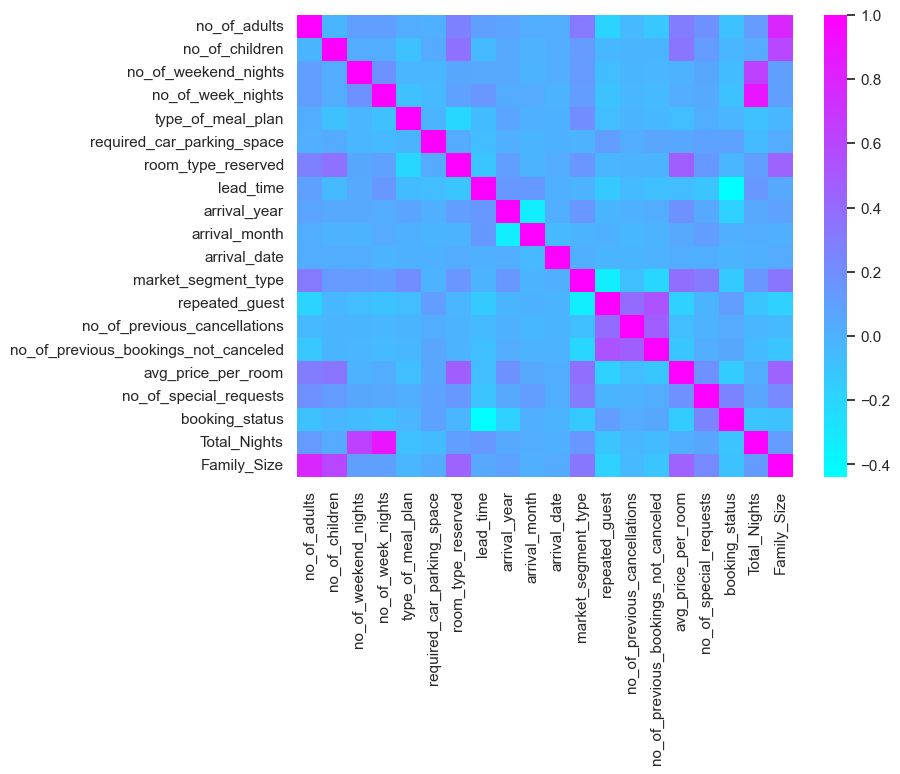

In [14]:
sns.heatmap(df.corr(), cmap="cool", annot=False)

In [15]:
df.corr()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,Total_Nights,Family_Size
no_of_adults,1.000000,-0.019787,0.103316,0.105622,0.025555,0.011429,0.270348,0.097287,0.076719,0.021841,0.026338,0.314103,-0.192277,-0.047426,-0.119166,0.296886,0.189401,-0.086920,0.133803,0.785371
no_of_children,-0.019787,1.000000,0.029478,0.024398,-0.086764,0.034244,0.364073,-0.047091,0.045983,-0.003076,0.025482,0.130618,-0.036348,-0.016390,-0.021189,0.337728,0.124486,-0.033078,0.033644,0.603365
no_of_weekend_nights,0.103316,0.029478,1.000000,0.179577,-0.027327,-0.031111,0.057368,0.046595,0.055357,-0.009894,0.027304,0.129069,-0.067107,-0.020690,-0.026312,-0.004525,0.060593,-0.061563,0.629339,0.100658
no_of_week_nights,0.105622,0.024398,0.179577,1.000000,-0.083431,-0.048784,0.094125,0.149650,0.032672,0.037376,-0.009305,0.112952,-0.099764,-0.030080,-0.049344,0.022753,0.045994,-0.092996,0.877513,0.099352
type_of_meal_plan,0.025555,-0.086764,-0.027327,-0.083431,1.000000,-0.012991,-0.209176,-0.060271,0.071396,0.008564,0.004833,0.203361,-0.062995,-0.011622,-0.038183,-0.069257,0.022091,-0.026706,-0.079230,-0.033337
required_car_parking_space,0.011429,0.034244,-0.031111,-0.048784,-0.012991,1.000000,0.038778,-0.066445,0.015684,-0.015505,-0.000037,-0.003723,0.110909,0.027106,0.063810,0.061304,0.087922,0.086185,-0.053704,0.030318
room_type_reserved,0.270348,0.364073,0.057368,0.094125,-0.209176,0.038778,1.000000,-0.107793,0.103369,-0.005967,0.032919,0.156610,-0.025826,-0.007936,-0.008139,0.469899,0.145041,-0.022986,0.102322,0.441050
lead_time,0.097287,-0.047091,0.046595,0.149650,-0.060271,-0.066445,-0.107793,1.000000,0.143439,0.136814,0.006479,-0.006933,-0.135984,-0.045723,-0.078137,-0.062596,-0.101645,-0.438538,0.140934,0.048441
arrival_year,0.076719,0.045983,0.055357,0.032672,0.071396,0.015684,0.103369,0.143439,1.000000,-0.339689,0.018849,0.150027,-0.018175,0.003919,0.026422,0.178605,0.053205,-0.179529,0.052795,0.089663
arrival_month,0.021841,-0.003076,-0.009894,0.037376,0.008564,-0.015505,-0.005967,0.136814,-0.339689,1.000000,-0.042780,-0.006311,0.000341,-0.038615,-0.010718,0.054423,0.110552,0.011233,0.024703,0.015517


In [16]:
#"no_of_special_requests" and "repeated_guest" have relatively strong correlation with"booking_status" among other features

<AxesSubplot:xlabel='booking_status', ylabel='count'>

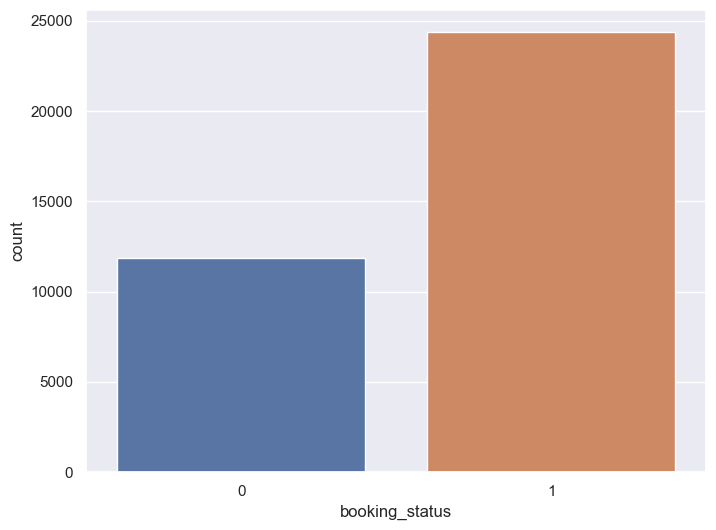

In [17]:
sns.countplot(data=df, x='booking_status')

<AxesSubplot:xlabel='no_of_special_requests', ylabel='repeated_guest'>

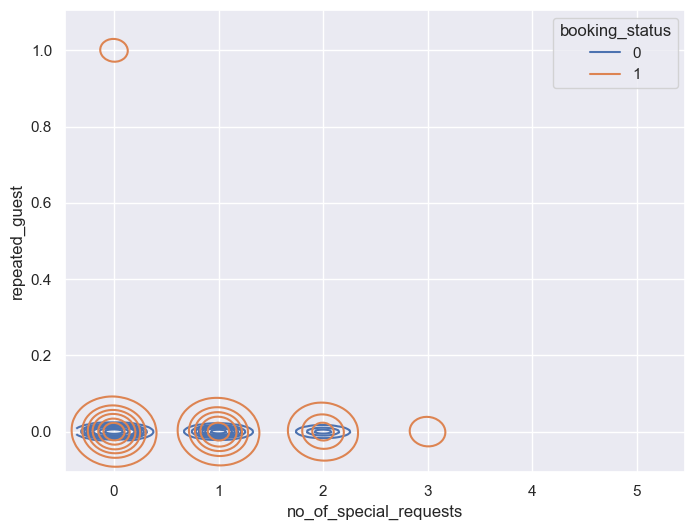

In [18]:
sns.kdeplot(x="no_of_special_requests", y="repeated_guest", data=df,hue="booking_status")

In [19]:
X = df.iloc[:, df.columns!='booking_status']
y = df.iloc[:, -3]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [21]:
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [22]:
print(f"{X_train.min(axis=0)}")
print("----------------------------------")
print(f"{X_train.max(axis=0)}")

[0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000
 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000
 0.000000 0.000000 0.000000]
----------------------------------
[1.000000 1.000000 1.000000 1.000000 1.000000 1.000000 1.000000 1.000000
 1.000000 1.000000 1.000000 1.000000 1.000000 1.000000 1.000000 1.000000
 1.000000 1.000000 1.000000]


In [23]:
# Implementing KNN Classifier

In [24]:
classifier = KNeighborsClassifier()
classifier = KNeighborsClassifier(n_neighbors = 5)#Randomly selecting 5 neighbors
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [25]:
y_pred = classifier.predict(X_test)
print(y_pred)

[1 0 0 ... 1 1 1]


In [26]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(f"{tn=},{fp=},{fn=},{tp=}")

tn=2189,fp=818,fn=577,tp=5485


In [27]:
confusion_mat = confusion_matrix(y_test, y_pred)
print(confusion_mat)

[[2189  818]
 [ 577 5485]]


<AxesSubplot:>

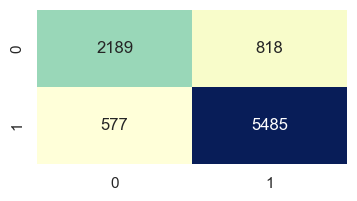

In [28]:
plt.figure(figsize=(4,2))
sns.heatmap(confusion_mat, annot=True, fmt="g", cbar=False, cmap="YlGnBu")

In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.73      0.76      3007
           1       0.87      0.90      0.89      6062

    accuracy                           0.85      9069
   macro avg       0.83      0.82      0.82      9069
weighted avg       0.84      0.85      0.84      9069



In [30]:
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")

Accuracy: 0.8462
Precision: 0.8702
Recall: 0.9048


[0.15514389679126694, 0.1806152828316242, 0.15205645605910242, 0.1625317014003749, 0.1538207079060536, 0.15723894585952145, 0.14907928106737237, 0.151946190318668, 0.15029220421215128, 0.15260778476127468, 0.15227698753997132, 0.1540412393869225, 0.1538207079060536, 0.15492336531039805, 0.1536001764251847, 0.1548130995699636, 0.15679788289778365, 0.1590031977064726, 0.15745947734039034, 0.15911346344690705, 0.15701841437865255, 0.15856213474473482, 0.15933399492777595, 0.16153930973646488, 0.1631932958429816, 0.16429595324732604, 0.16286249862167823, 0.1618701069577682, 0.1618701069577682]
Minimum error: 0.14907928106737237 at K = 6


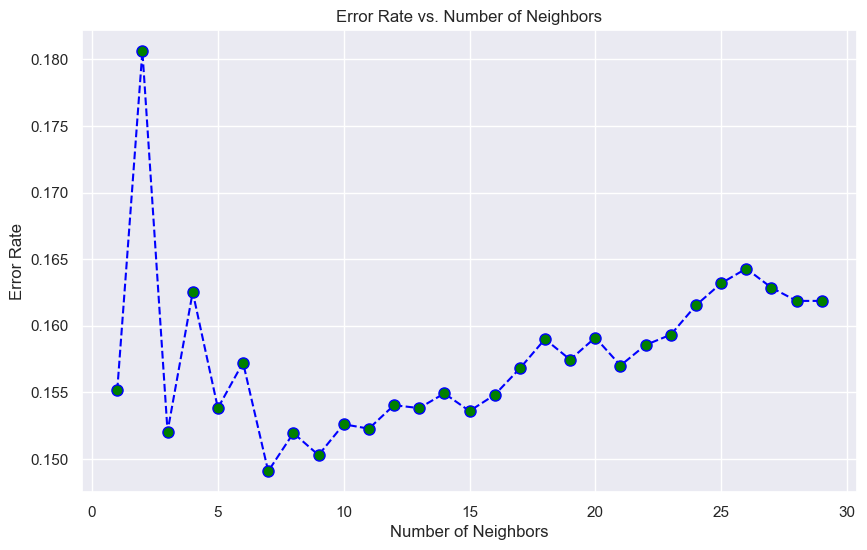

In [31]:
error_rate = []
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    predct = knn.predict(X_test)
    error_rate.append(np.mean(predct != y_test))
print(error_rate)

plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='green', markersize=8)
plt.title('Error Rate vs. Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Error Rate')
print("Minimum error:", min(error_rate), "at K =" , error_rate.index(min(error_rate)))

In [32]:
classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [33]:
y_pred = classifier.predict(X_test)
y_pred_prob =classifier.predict_proba(X_test)[:, 1]
print(y_pred_prob)
print(len(y_pred))

[1.000000 0.000000 0.000000 ... 0.714286 0.571429 0.857143]
9069


<AxesSubplot:>

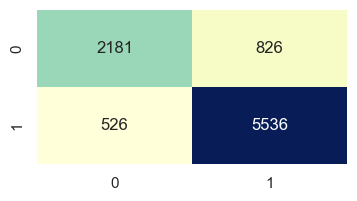

In [34]:
confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,2))
sns.heatmap(confusion_mat, annot=True, fmt="g", cbar=False, cmap="YlGnBu")

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.73      0.76      3007
           1       0.87      0.91      0.89      6062

    accuracy                           0.85      9069
   macro avg       0.84      0.82      0.83      9069
weighted avg       0.85      0.85      0.85      9069



In [36]:
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")

Accuracy: 0.8509
Precision: 0.8702
Recall: 0.9132


In [37]:
# Implementing Decision Tree Classifier

In [38]:
new_data = df[['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status',
       'Total_Nights', 'Family_Size']]

[0.23883559378101224, 0.23883559378101224, 0.21115889293196605, 0.17157349211599957, 0.16716286249862167, 0.15448230234866028, 0.15348991068475024, 0.13750137832175544, 0.13209835704046752, 0.12603374131657294, 0.12504134965266292, 0.12449002095049068, 0.12096151725658838, 0.12504134965266292, 0.12691586724004852, 0.12912118204873746, 0.12790825890395854, 0.1296725107509097, 0.1313264968574264, 0.13011357371264748, 0.12956224501047525, 0.1304443709339508, 0.12956224501047525, 0.1315470283382953, 0.1311059653765575, 0.13242915426177088, 0.1313264968574264, 0.1329804829639431, 0.1327599514830742]
Minimum error: 0.12096151725658838 at D = 12


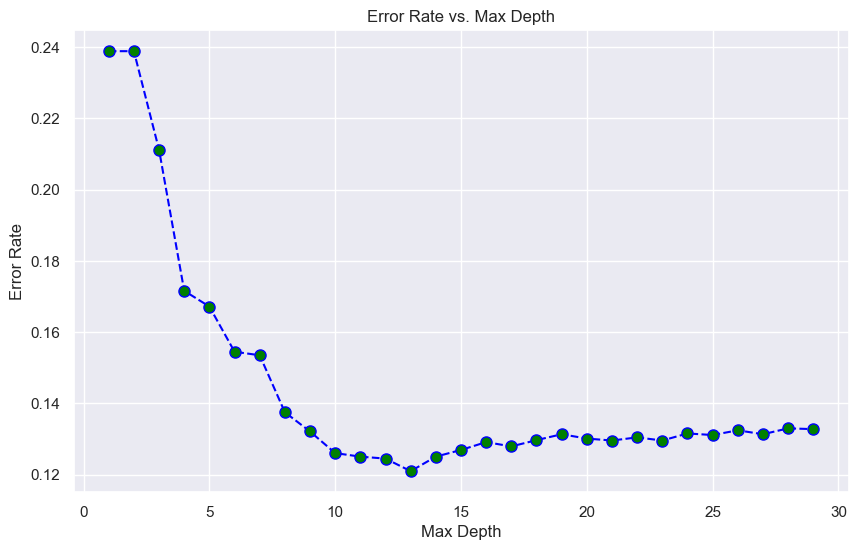

In [39]:
error_rate = []
for i in range(1,30):
    dt = DecisionTreeClassifier(max_depth=i)
    dt.fit(X_train,y_train)
    predct = dt.predict(X_test)
    error_rate.append(np.mean(predct != y_test))
print(error_rate)

plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='green', markersize=8)
plt.title('Error Rate vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Error Rate')
print("Minimum error:", min(error_rate), "at D =" , error_rate.index(min(error_rate)))

In [40]:
dt = DecisionTreeClassifier(criterion='gini',max_depth=13,random_state=0)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=13, random_state=0)

In [41]:
y_pred_2 = dt.predict(X_test)
y_pred_prob_2 =dt.predict_proba(X_test)[:, 1]
print(y_pred_prob_2)
print(len(y_pred_2))

[1.000000 0.000000 0.000000 ... 1.000000 0.837576 0.610169]
9069


In [42]:
dot_data = tree.export_graphviz(dt, out_file=None, 
    feature_names=df.drop('booking_status', axis=1).columns,    
    class_names=df['booking_status'].unique().astype(str),  
    filled=True, rounded=True,  
    special_characters=True)
     
graph = graphviz.Source(dot_data)
graph

In [43]:
# Accuracy on Train
print("Training Accuracy is: ", dt.score(X_train, y_train))

# Accuracy on Train
print("Testing Accuracy is: ", dt.score(X_test, y_test))

Training Accuracy is:  0.9097625523781518
Testing Accuracy is:  0.8782666225603705


<AxesSubplot:>

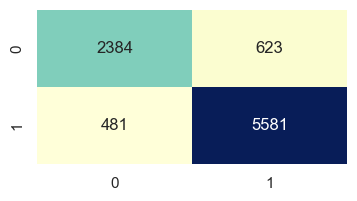

In [44]:
confusion_mat = confusion_matrix(y_test, y_pred_2)
plt.figure(figsize=(4,2))
sns.heatmap(confusion_mat, annot=True, fmt="g", cbar=False, cmap="YlGnBu")

In [45]:
# Confusion Matrix function
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

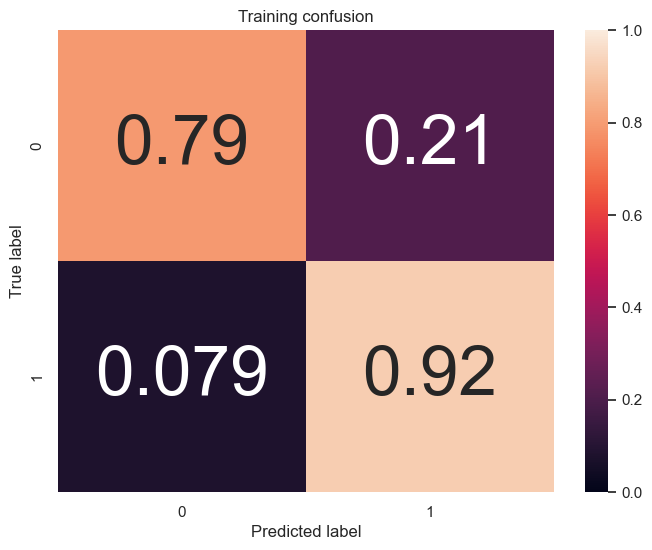

In [46]:
# Plotting Confusion Matrix
cm = confusion_matrix(y_test, y_pred_2)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=dt.classes_, title='Training confusion')

In [47]:
# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)


# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print ("The True Positive rate / Recall per class is: ",TPR)

# Precision or positive predictive value
PPV = TP/(TP+FP)
print ("The Precision per class is: ",PPV)

# False positive rate or False alarm rate
FPR = FP/(FP+TN)
print ("The False Alarm rate per class is: ",FPR)

# False negative rate or Miss Rate
FNR = FN/(TP+FN)
print ("The Miss Rate rate per class is: ",FNR)

# Classification error
CER = (FP+FN)/(TP+FP+FN+TN)
print ("The Classification error of each class is", CER)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print ("The Accuracy of each class is", ACC)
print("")

##Total averages :
print ("The average Recall is: ",TPR.sum()/2)
print ("The average Precision is: ",PPV.sum()/2)
print ("The average False Alarm is: ",FPR.sum()/2)
print ("The average Miss Rate rate is: ",FNR.sum()/2)
print ("The average Classification error is", CER.sum()/2)
print ("The average Accuracy is", ACC.sum()/2)


The True Positive rate / Recall per class is:  [0.792817 0.920653]
The Precision per class is:  [0.832112 0.899581]
The False Alarm rate per class is:  [0.079347 0.207183]
The Miss Rate rate per class is:  [0.207183 0.079347]
The Classification error of each class is [0.121733 0.121733]
The Accuracy of each class is [0.878267 0.878267]

The average Recall is:  0.8567350053219054
The average Precision is:  0.8658463041915198
The average False Alarm is:  0.14326499467809467
The average Miss Rate rate is:  0.14326499467809467
The average Classification error is 0.1217333774396295
The average Accuracy is 0.8782666225603705


In [48]:
# Implementing Logistic Regression

In [49]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [50]:
y_pred_3 = classifier.predict(X_test)
y_pred_prob_3 =classifier.predict_proba(X_test)[:, 1]
print(y_pred_prob_3)
print(len(y_pred_3))

[0.904127 0.670874 0.299388 ... 0.546817 0.845137 0.957657]
9069


In [51]:
cm = confusion_matrix(y_test, y_pred_3)
print(cm)

[[1811 1196]
 [ 587 5475]]


In [52]:
# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)


# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print ("The True Positive rate / Recall per class is: ",TPR)

# Precision or positive predictive value
PPV = TP/(TP+FP)
print ("The Precision per class is: ",PPV)

# False positive rate or False alarm rate
FPR = FP/(FP+TN)
print ("The False Alarm rate per class is: ",FPR)

# False negative rate or Miss Rate
FNR = FN/(TP+FN)
print ("The Miss Rate rate per class is: ",FNR)

# Classification error
CER = (FP+FN)/(TP+FP+FN+TN)
print ("The Classification error of each class is", CER)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print ("The Accuracy of each class is", ACC)
print("")

##Total averages :
print ("The average Recall is: ",TPR.sum()/2)
print ("The average Precision is: ",PPV.sum()/2)
print ("The average False Alarm is: ",FPR.sum()/2)
print ("The average Miss Rate rate is: ",FNR.sum()/2)
print ("The average Classification error is", CER.sum()/2)
print ("The average Accuracy is", ACC.sum()/2)

The True Positive rate / Recall per class is:  [0.602261 0.903167]
The Precision per class is:  [0.755213 0.820717]
The False Alarm rate per class is:  [0.096833 0.397739]
The Miss Rate rate per class is:  [0.397739 0.096833]
The Classification error of each class is [0.196604 0.196604]
The Accuracy of each class is [0.803396 0.803396]

The average Recall is:  0.7527143308086696
The average Precision is:  0.7879646057418808
The average False Alarm is:  0.2472856691913304
The average Miss Rate rate is:  0.2472856691913304
The average Classification error is 0.19660381519461903
The average Accuracy is 0.803396184805381


In [53]:
# Plotting ROC AUC Curve

In [54]:
test_df = pd.DataFrame(
    {'True': y_test, 'KNN': y_pred_prob, 'DecisionTree': y_pred_prob_2,'LogisticRegression': y_pred_prob_3})

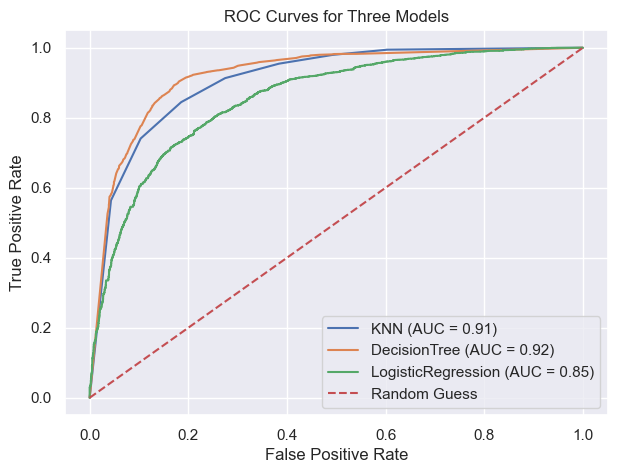

In [55]:
plt.figure(figsize=(7, 5))
 
for model in ['KNN', 'DecisionTree','LogisticRegression']:
    fpr, tpr, _ = roc_curve(test_df['True'], test_df[model])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model} (AUC = {roc_auc:.2f})')
 
# Plot random guess line
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
 
# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Three Models')
plt.legend()
plt.show()